Median Filtering

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
pad = 5 // 3

In [3]:
Avg_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

In [9]:
img = cv.imread('CoverImages/baboon.tiff',0)


In [10]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

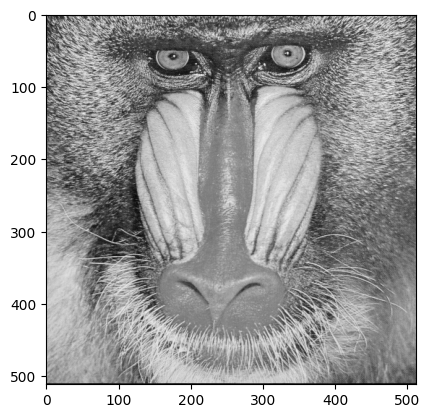

In [8]:
img = cv.imread('CoverImages/baboon.tiff',0)
plt.imshow(img,cmap='gray')
plt.show()

In [11]:
convol_Avg = convolution(img,Avg_kernel)
np.shape(convol_Avg)

(512, 512)

In [12]:
convol_Avg

array([[ 46,  56,  44, ...,  88,  94,  67],
       [ 67,  82,  67, ..., 120, 123,  85],
       [ 68,  88,  77, ..., 104,  98,  65],
       ...,
       [ 92, 139, 138, ...,  86,  83,  54],
       [ 67,  98,  95, ...,  57,  54,  35],
       [ 35,  51,  47, ...,  28,  26,  17]], dtype=uint8)

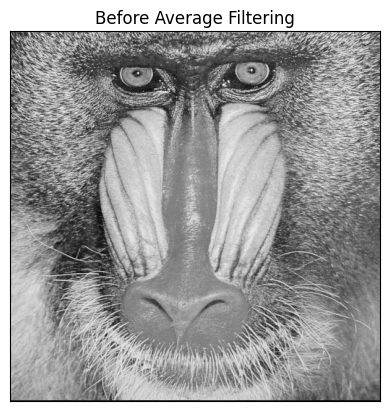

In [14]:
plt.imshow(img, cmap='gray')
plt.title("Before Average Filtering")
plt.xticks([])
plt.yticks([])
plt.show()

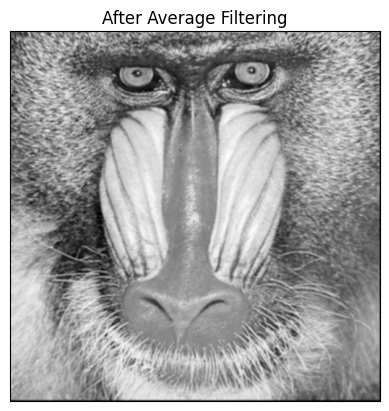

In [13]:
plt.imshow(convol_Avg, cmap='gray')
plt.title("After Average Filtering")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
def medianFiltering(im):
    rows=im.shape[0]
    cols=im.shape[1]
    img = np.zeros((rows,cols), dtype='int')
    im = np.pad(im, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            list1=[im[i][j],im[i-1][j],im[i+1][j],im[i][j-1],im[i][j+1],im[i-1][j-1],im[i-1][j+1],im[i+1][j-1],im[i+1][j+1]]
            list1.sort()
            img[i][j]=list1[4]
    return img

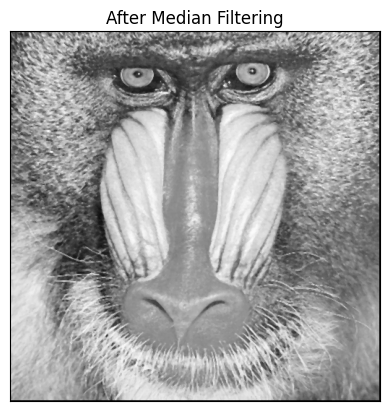

In [16]:
median = medianFiltering(img)
plt.imshow(median,cmap='gray')
plt.title("After Median Filtering")
plt.xticks([])
plt.yticks([])
plt.show()